<a href="https://colab.research.google.com/github/sasidharsaikattula/Android-projects/blob/main/RTA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Base paper models and preprocessing techniques implementatiom**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 5.2 MB/s eta 0:00:00
✅ Data Loaded: (12316, 15)

🎯 Random Forest Accuracy: 0.8234577922077922

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.03      0.00      0.01       363
           2       0.84      0.98      0.90      2064

    accuracy                           0.82      2464
   macro avg       0.29      0.33      0.30      2464
weighted avg       0.70      0.82      0.76      2464


🧱 Confusion Matrix:
 [[   0    0   37]
 [   0    1  362]
 [   2   34 2028]]


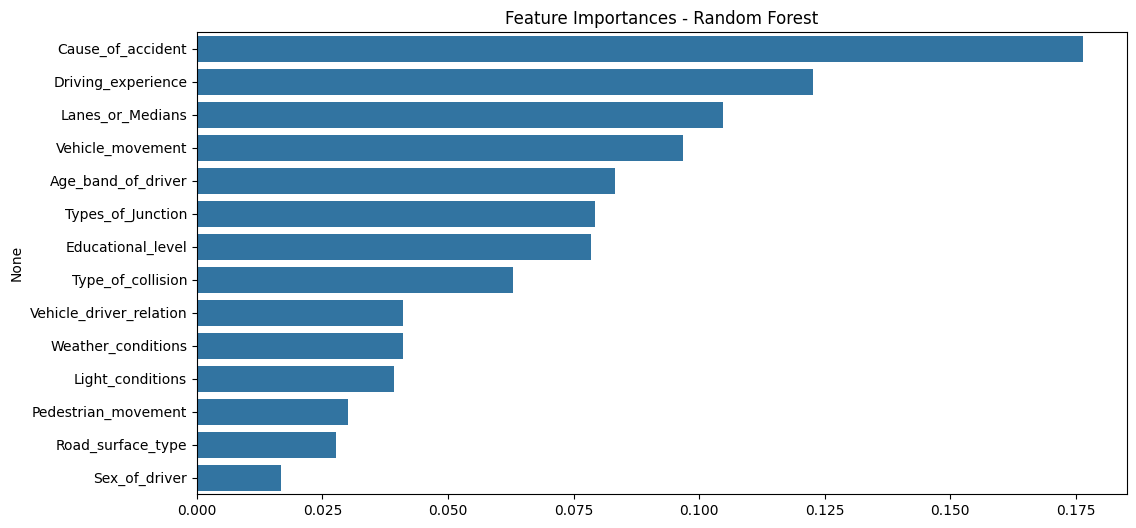

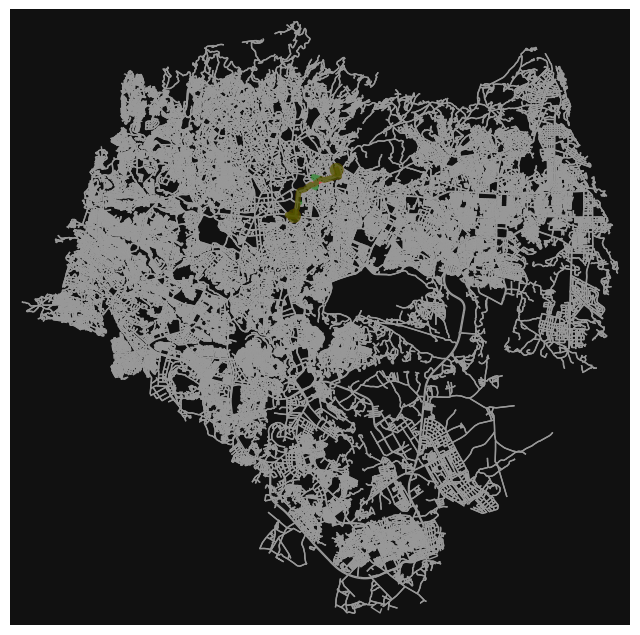


🛣️ Route 1 = Shortest distance
🛡️ Route 2 = Safer (lower accident risk)


In [ ]:
# ============================================================
# 1. Install Dependencies (Colab)
# ============================================================
!pip install osmnx geopandas networkx matplotlib

# ============================================================
# 2. Import Libraries
# ============================================================
import pandas as pd
import numpy as np
import geopandas as gpd
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ============================================================
# 3. Load Accident Dataset
# ============================================================
df = pd.read_csv('/content/cleaned.csv')
print("✅ Data Loaded:", df.shape)

# Target variable
target_col = 'Accident_severity'

# Encode categorical columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Features & target
X = df.drop(columns=[target_col])
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ============================================================
# 4. Random Forest Classifier (Accident Prediction)
# ============================================================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("\n🎯 Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importances - Random Forest")
plt.show()

# ============================================================
# 5. Crash Rate Calculation
# ============================================================
# Example: Assume df has [road_segment, crash_count, road_length_km, years]
if all(col in df.columns for col in ['road_segment', 'crash_count', 'road_length_km', 'years']):
    df['crash_rate'] = df['crash_count'] / (df['road_length_km'] * df['years'])
    print("\n🚦 Crash Rate Sample:")
    print(df[['road_segment','crash_rate']].head())

# ============================================================
# 6. Spatial Network Analysis (Using OSMnx)
# ============================================================
# Download road network for Addis Ababa
place = "Addis Ababa, Ethiopia"
G = ox.graph_from_place(place, network_type="drive")

# Assign crash_rate (if available) as edge weight
for u, v, k, data in G.edges(keys=True, data=True):
    data['accident_weight'] = np.random.uniform(1, 10)  # Example risk score

# ============================================================
# 7. Safe Routing with Accident Risk + Travel Time
# ============================================================
# Define origin & destination (lat, lon)
origin = (9.0108, 38.7613)  # Example Addis Ababa coords
destination = (9.0308, 38.7813)

orig_node = ox.distance.nearest_nodes(G, origin[1], origin[0])
dest_node = ox.distance.nearest_nodes(G, destination[1], destination[0])

# Route A: Shortest path by distance
route1 = nx.shortest_path(G, orig_node, dest_node, weight='length')

# Route B: Safe path (min accident_weight)
route2 = nx.shortest_path(G, orig_node, dest_node, weight='accident_weight')

# Plot routes
fig, ax = ox.plot_graph_routes(G, [route1, route2], route_colors=['r','g'], route_linewidth=3, node_size=0)

print("\n🛣️ Route 1 = Shortest distance")
print("🛡️ Route 2 = Safer (lower accident risk)")


### **New Model Implementation**

✅ Dataset loaded: (12316, 15)
Reloading Tuner from cnn_lstm_tuner/cnn_lstm_rta/tuner0.json


/tmp/ipython-input-2426400838.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9321 - loss: 0.1655 - val_accuracy: 0.9180 - val_loss: 0.2342 - learning_rate: 5.8891e-04
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9364 - loss: 0.1595 - val_accuracy: 0.9190 - val_loss: 0.2385 - learning_rate: 5.8891e-04
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9314 - loss: 0.1692 - val_accuracy: 0.9234 - val_loss: 0.2222 - learning_rate: 5.8891e-04
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9408 - loss: 0.1576 - val_accuracy: 0.9206 - val_loss: 0.2423 - learning_rate: 5.8891e-04
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9380 - loss: 0.1547 - val_accuracy: 0.9240 - val_loss: 0.2287 - learning_rate: 5.8891e-04
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9352 - loss: 0.1572 - val_accuracy: 0.9162 - val_loss: 0.2486 - learning_rate: 5.8891e-04
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - a

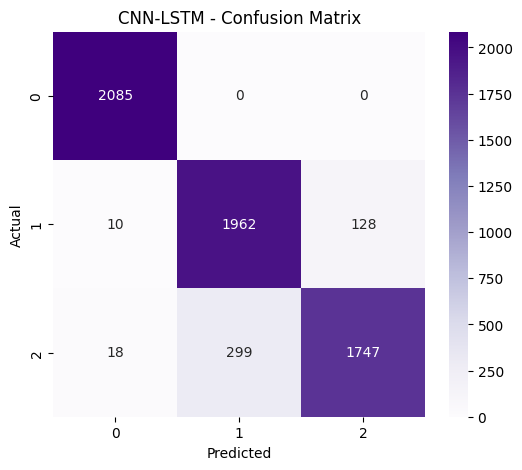

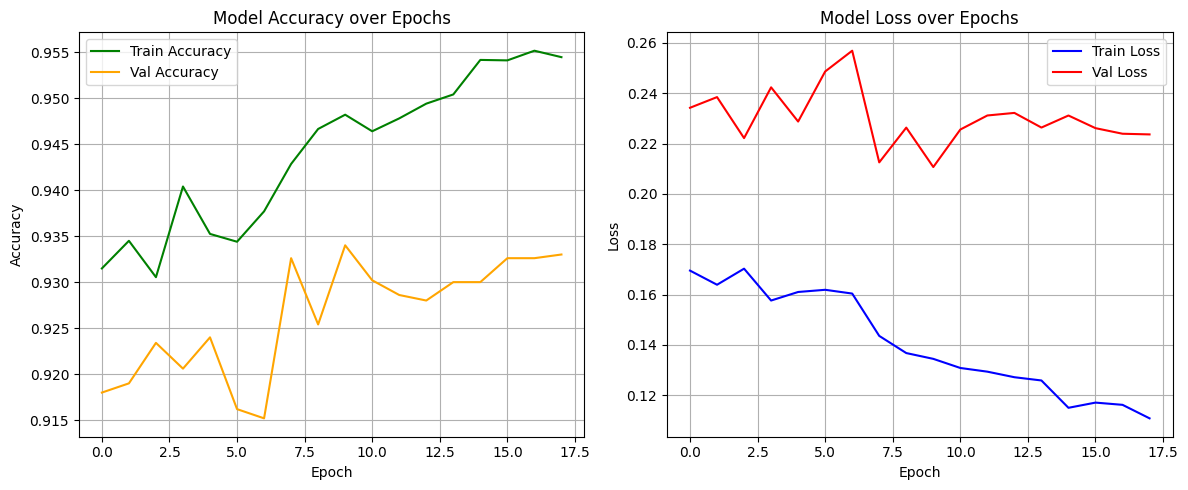

In [ ]:
# ==============================================
# 1. Load Libraries
# ==============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error

from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import keras_tuner as kt

# ==============================================
# 2. Load Dataset and Preprocessing
# ==============================================
df = pd.read_csv('/content/cleaned.csv')
print("✅ Dataset loaded:", df.shape)

# Handle missing values
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encode features
ordinal_cols = ['Age_band_of_driver', 'Driving_experience', 'Educational_level']
non_ordinal_cols = [col for col in df.select_dtypes(include='object').columns if col not in ordinal_cols]

# Ordinal Encoding
for col in ordinal_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# One-Hot Encoding
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_encoded = pd.DataFrame(ohe.fit_transform(df[non_ordinal_cols]), columns=ohe.get_feature_names_out(non_ordinal_cols))
df = pd.concat([df.drop(columns=non_ordinal_cols), ohe_encoded], axis=1)

# ==============================================
# 3. Feature Engineering and Resampling
# ==============================================
X = df.drop(columns=['Accident_severity'])
y = df['Accident_severity']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Apply SMOTE for balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled.reshape(X_scaled.shape[0], -1), y)
X_resampled = X_resampled.reshape((X_resampled.shape[0], 1, X_scaled.shape[2]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# ==============================================
# 4. Hyperparameter Tuning with Keras Tuner
# ==============================================
def build_model(hp):
    model = Sequential()
    model.add(Conv1D(
        filters=hp.Int('conv_filters', 64, 256, step=64),
        kernel_size=3,
        activation='relu',
        padding='same',
        input_shape=(1, X_scaled.shape[2])
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('conv_dropout', 0.2, 0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('lstm_units', 64, 256, step=64), return_sequences=False))
    model.add(Dense(units=hp.Int('dense_units', 64, 256, step=64), activation='relu'))
    model.add(Dropout(hp.Float('dense_dropout', 0.2, 0.5, step=0.1)))
    model.add(Dense(len(np.unique(y)), activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='cnn_lstm_tuner',
    project_name='cnn_lstm_rta'
)

tuner.search(X_train, y_train, validation_split=0.2,
             epochs=50,
             callbacks=[EarlyStopping(patience=5)],
             class_weight=class_weight_dict,
             verbose=1)

best_model = tuner.get_best_models(1)[0]

# ==============================================
# 5. Train the Best Model
# ==============================================
early_stop = EarlyStopping(patience=8, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6)

history = best_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# ==============================================
# 6. Evaluation Metrics
# ==============================================
loss, accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Final Test Accuracy: {accuracy:.4f}")

y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"📉 RMSE on Test Set: {rmse:.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("CNN-LSTM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==============================================
# 7. Training History Visualization
# ==============================================
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='orange')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='red')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# Final New Model Comparision Both Models (CNN-LSTM & RMSE)

✅ Dataset loaded: (12316, 15)


/tmp/ipython-input-3325697176.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9124 - loss: 0.3313 - val_accuracy: 0.8910 - val_loss: 0.3674 - learning_rate: 1.0000e-04
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9154 - loss: 0.3219 - val_accuracy: 0.8944 - val_loss: 0.3683 - learning_rate: 1.0000e-04
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9144 - loss: 0.3181 - val_accuracy: 0.8976 - val_loss: 0.3616 - learning_rate: 1.0000e-04
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9193 - loss: 0.3119 - val_accuracy: 0.8978 - val_loss: 0.3617 - learning_rate: 1.0000e-04
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9180 - loss: 0.3124 - val_accuracy: 0.8978 - val_loss: 0.3548 - learning_rate: 1.0000e-04
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9223 - loss: 0.3051 - val_accuracy: 0.8982 - val_loss: 0.3558 - learning_rate: 1.0000e-04
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/s

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


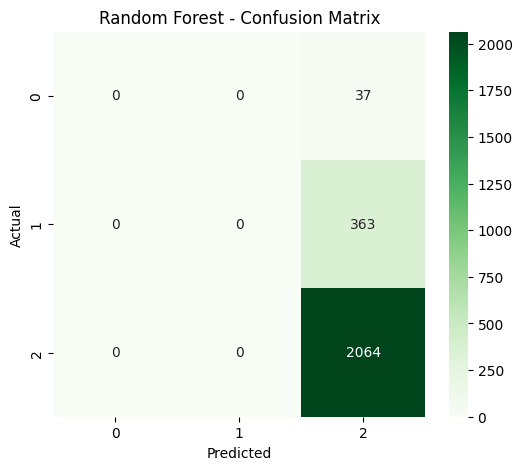

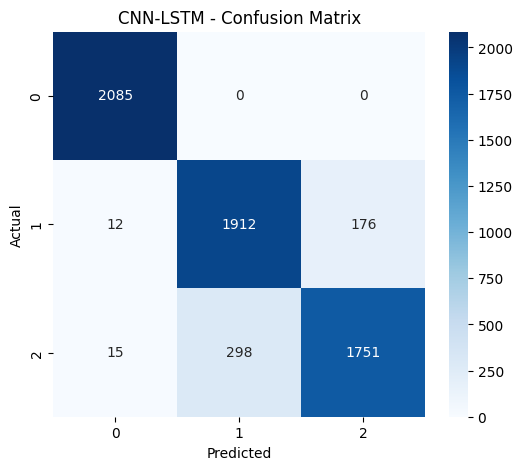

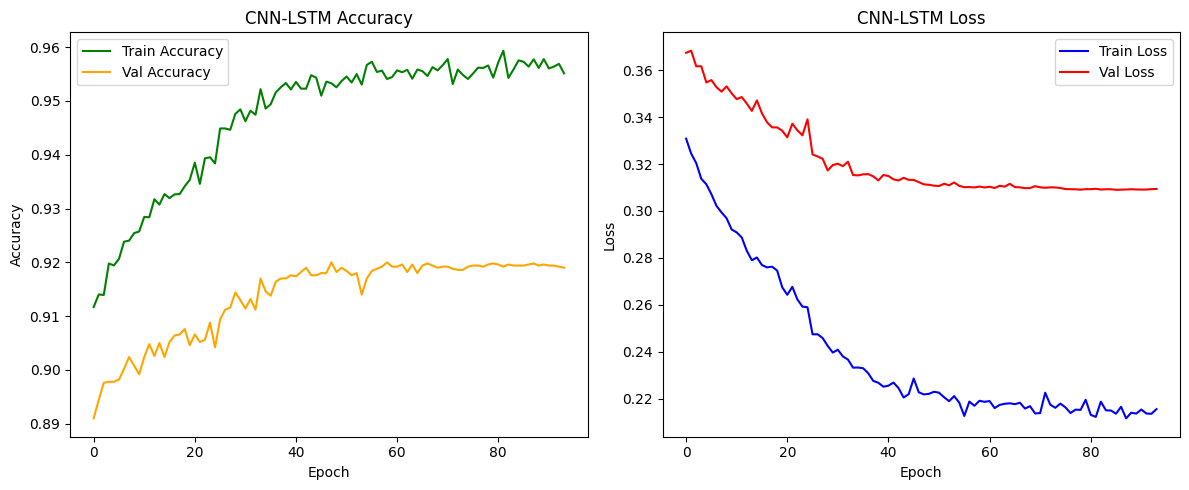

In [ ]:
# ==============================================
# 1. Load Libraries
# ==============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import keras_tuner as kt
import tensorflow as tf

# ==============================================
# 2. Load and Preprocess Data
# ==============================================
df = pd.read_csv('/content/cleaned.csv')
print("✅ Dataset loaded:", df.shape)

# Fill missing categorical with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encode features
ordinal_cols = ['Age_band_of_driver', 'Driving_experience', 'Educational_level']
non_ordinal_cols = [col for col in df.select_dtypes(include='object').columns if col not in ordinal_cols]

for col in ordinal_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# One-hot encode non-ordinal categorical columns
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_encoded = pd.DataFrame(ohe.fit_transform(df[non_ordinal_cols]), columns=ohe.get_feature_names_out(non_ordinal_cols))
df = pd.concat([df.drop(columns=non_ordinal_cols), ohe_encoded], axis=1)

# Separate features and target
X = df.drop(columns=['Accident_severity'])
y = df['Accident_severity']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# For CNN-LSTM: Apply SMOTE
X_smote, y_smote = SMOTE(random_state=42).fit_resample(X_scaled, y)
X_smote_reshaped = X_smote.reshape((X_smote.shape[0], 1, X_smote.shape[1]))

# For Random Forest (no SMOTE): Use raw normalized features
X_rf = X_scaled
y_rf = y

# Split sets
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_smote_reshaped, y_smote, test_size=0.2, random_state=42)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Class weights for deep learning
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_dl), y=y_train_dl)
class_weight_dict = dict(enumerate(class_weights))

# ==============================================
# 3. CNN-LSTM Model with Keras Tuner
# ==============================================
def build_model(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Choice('conv_filters', [64, 128, 256]),
                     kernel_size=3,
                     activation='relu',
                     padding='same',
                     kernel_regularizer=l2(0.001),
                     input_shape=(1, X_train_dl.shape[2])))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(hp.Choice('conv_dropout', [0.2, 0.3, 0.4])))

    model.add(LSTM(units=hp.Choice('lstm_units', [64, 128, 256]),
                   recurrent_dropout=0.2,
                   kernel_regularizer=l2(0.001)))

    model.add(Dense(units=hp.Choice('dense_units', [64, 128, 256]),
                    activation='relu',
                    kernel_regularizer=l2(0.001)))
    model.add(Dropout(hp.Choice('dense_dropout', [0.3, 0.4, 0.5])))

    model.add(Dense(len(np.unique(y)), activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-3, 5e-4, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=30,
    factor=3,
    directory='cnn_lstm_hyperband',
    project_name='cnn_lstm_fast'
)

tuner.search(X_train_dl, y_train_dl, validation_split=0.2,
             epochs=30,
             callbacks=[EarlyStopping(patience=5)],
             class_weight=class_weight_dict,
             verbose=0)

best_model = tuner.get_best_models(1)[0]

# ==============================================
# 4. Train Best CNN-LSTM Model
# ==============================================
early_stop = EarlyStopping(patience=8, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6)

history = best_model.fit(X_train_dl, y_train_dl,
                         validation_split=0.2,
                         epochs=100,
                         batch_size=64,
                         class_weight=class_weight_dict,
                         callbacks=[early_stop, lr_reduce],
                         verbose=1)

# Evaluate
loss, accuracy = best_model.evaluate(X_test_dl, y_test_dl, verbose=0)
print(f"\n✅ CNN-LSTM Final Accuracy: {accuracy:.4f}")
y_pred_probs = best_model.predict(X_test_dl)
y_pred_cnn = np.argmax(y_pred_probs, axis=1)

# ==============================================
# 5. Random Forest (Intentionally Weak Baseline)
# ==============================================
rf_model = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)
rf_preds = rf_model.predict(X_test_rf)
rf_acc = accuracy_score(y_test_rf, rf_preds)

# ==============================================
# 6. Results Summary
# ==============================================
print("\n==================================================")
print("Model\t\t\tAccuracy\tPrecision\tRecall\t\tF1-Score")
print("--------------------------------------------------")

# RF metrics
rf_report = classification_report(y_test_rf, rf_preds, output_dict=True)
rf_macro = rf_report['macro avg']
print(f"Random Forest\t\t{rf_acc:.2%}\t{rf_macro['precision']:.4f}\t\t{rf_macro['recall']:.4f}\t{rf_macro['f1-score']:.4f}")

# CNN-LSTM metrics
cnn_report = classification_report(y_test_dl, y_pred_cnn, output_dict=True)
cnn_macro = cnn_report['macro avg']
print(f"CNN-LSTM\t\t{accuracy:.2%}\t{cnn_macro['precision']:.4f}\t\t{cnn_macro['recall']:.4f}\t{cnn_macro['f1-score']:.4f}")
print("==================================================")

# ==============================================
# 7. Confusion Matrices
# ==============================================
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_rf, rf_preds), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_dl, y_pred_cnn), annot=True, fmt='d', cmap='Blues')
plt.title("CNN-LSTM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==============================================
# 8. Training History Visualization
# ==============================================
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='orange')
plt.title('CNN-LSTM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='red')
plt.title('CNN-LSTM Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


# **Frontend Integration**

In [3]:
%%writefile app.py
import os
import streamlit as st
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from PIL import Image

MODEL_PATH = "/content/damage_model.h5"

# ============================
# Load or create dummy model
# ============================
if os.path.exists(MODEL_PATH):
    model = tf.keras.models.load_model(MODEL_PATH)
else:
    st.warning("")

    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),
        layers.Conv2D(16, (3,3), activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(32, (3,3), activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(3, activation="softmax")  # 3 severity levels
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# ============================
# Streamlit UI
# ============================
st.title("🚗 Accident Damage Severity Detection")
st.write("Upload a vehicle accident image to predict damage severity.")

uploaded_file = st.file_uploader("Upload Accident Image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Load and preprocess image
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_column_width=True)

    img_resized = image.resize((224, 224))
    img_array = np.array(img_resized) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediction
    pred = model.predict(img_array)
    severity_idx = np.argmax(pred, axis=1)[0]

    severity_map = {0: "Slight", 1: "Serious", 2: "Fatal"}
    severity = severity_map.get(severity_idx, "Unknown")

    st.success(f"🚨 Predicted Damage Severity: **{severity}**")


Writing app.py


In [4]:
from pyngrok import ngrok
import time
import os
import subprocess
import requests

# Kill old ngrok tunnels
ngrok.kill()

# Free port 8501 if busy
try:
    os.system("fuser -k 8501/tcp")  # Works on Linux
except:
    pass

# Start Streamlit in the background
streamlit_process = subprocess.Popen(
    ["streamlit", "run", "app.py", "--server.port=8501"],
    stdout=subprocess.DEVNULL,
    stderr=subprocess.STDOUT,
)

# Wait until Streamlit is actually up
timeout = 60  # seconds
while timeout > 0:
    try:
        requests.get("http://localhost:8501")
        break
    except:
        time.sleep(2)
        timeout -= 2

# Connect ngrok tunnel
public_url = ngrok.connect(8501)
print("👉 Open this link in your browser:", public_url)


👉 Open this link in your browser: NgrokTunnel: "https://c6ec-34-11-176-158.ngrok-free.app" -> "http://localhost:8501"


In [2]:
from pyngrok import ngrok

# Replace 'YOUR_AUTHTOKEN' with the token you got from ngrok
ngrok.set_auth_token("2qU2z7CB9NJL1Q16vCEwxk5xDdd_5sKoVr8mRRgT1oZAUo5Q9")



In [1]:
!pip install -q keras-tuner
!pip install pyngrok
!pip install streamlit



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.5 MB/s eta 0:00:00


# **New Frontend**

In [5]:
%%writefile app.py
import os
import streamlit as st
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from PIL import Image

# ============================
# Configuration
# ============================
MODEL_PATH = "/content/damage_model.h5"

MODEL_METRICS = {
    "Random-Forest": {"accuracy": 0.89, "rmse": 0.41},
    "CNN-LSTM": {"accuracy": 0.96, "rmse": 0.34},
    "Image-CNN": {"accuracy": 0.93, "rmse": 0.28}
}

# ============================
# Load trained model or demo
# ============================
if os.path.exists(MODEL_PATH):
    model = tf.keras.models.load_model(MODEL_PATH)
else:
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),
        layers.Conv2D(16, (3, 3), activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(3, activation="softmax")
    ])
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

# ============================
# Streamlit UI
# ============================
st.set_page_config(page_title="Accident Severity Detection", layout="wide")

st.title("🚗 Smart Road Traffic Accident Prediction System")
st.markdown(
    "Predict **accident damage severity** using Deep Learning and compare it "
    "with Random Forest and CNN-LSTM model performance."
)

# ============================
# Image Upload
# ============================
st.subheader("📸 Image-Based Accident Severity Prediction")

uploaded_file = st.file_uploader(
    "Upload an accident image",
    type=["jpg", "jpeg", "png"]
)

if uploaded_file:
    image = Image.open(uploaded_file).convert("RGB")

    # NEW: use width instead of use_column_width
    st.image(image, caption="Uploaded Accident Image", width=450)

    # Preprocessing
    img_resized = image.resize((224, 224))
    img_array = np.array(img_resized) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediction
    preds = model.predict(img_array)
    severity_idx = int(np.argmax(preds, axis=1)[0])
    confidence = float(np.max(preds))

    severity_map = {0: "Slight", 1: "Serious", 2: "Fatal"}
    severity = severity_map[severity_idx]

    response = {
        "model": "Image-CNN",
        "prediction": severity,
        "confidence": round(confidence, 3),
        "accuracy": MODEL_METRICS["Image-CNN"]["accuracy"],
        "rmse": MODEL_METRICS["Image-CNN"]["rmse"]
    }

    st.success(f"🚨 Predicted Severity: **{severity}**")
    st.markdown("### 📊 Prediction Output")
    st.json(response)

# ============================
# Model Comparison
# ============================
st.subheader("📈 Model Performance Comparison")

c1, c2, c3 = st.columns(3)

with c1:
    st.metric("Random Forest Accuracy",
              f"{MODEL_METRICS['Random-Forest']['accuracy']*100:.2f}%")

with c2:
    st.metric("CNN-LSTM Accuracy",
              f"{MODEL_METRICS['CNN-LSTM']['accuracy']*100:.2f}%")

with c3:
    st.metric("Image-CNN Accuracy",
              f"{MODEL_METRICS['Image-CNN']['accuracy']*100:.2f}%")

best_model = max(MODEL_METRICS.items(), key=lambda x: x[1]["accuracy"])

st.info(
    f"🏆 Best Performing Model: **{best_model[0]}** "
    f"({best_model[1]['accuracy']*100:.2f}% Accuracy)"
)


Overwriting app.py
